# Question 1:

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define initial conditions and their probabilities
initial_distribution = {"Historian" : 0.05,
                        "Academician" : 0.0,
                        "Politician" : 0.1,
                        "R&D Engineer" : 0.6,
                        "Grad School" : 0.15,
                        "Digital Content Creator" : 0.1,
                        }

In [3]:
# a function to create samples
def create_sample():
	sample = np.random.choice(a = list(initial_distribution.keys()), p = list(initial_distribution.values()))
	return sample

In [4]:
# this will store the sample counts
sample_list = {"Historian" : 0,
"Academician" : 0,
 "Politician" : 0,
 "R&D Engineer" : 0,
 "Grad School" : 0,
 "Digital Content Creator" : 0,
 }

# getting samples
for i in range (100000):
    sample_list[create_sample()] += 1

# print current statistics
def print_dic(sample_dic):
    for i in sample_dic:
        print(f"{i}: {sample_dic[i]}")
print_dic(sample_list)

Historian: 4989
Academician: 0
Politician: 10062
R&D Engineer: 59860
Grad School: 15080
Digital Content Creator: 10009


In [5]:
# Annual Occupation Transition probabilities
transition_probabilities = np.array([
    [0.75, 0.15, 0,    0,    0.1,  0],
    [0,    0.94, 0.05, 0.01, 0,    0],
    [0,    0.05, 0.95, 0,    0,    0],
    [0,    0.25, 0.15, 0.5,  0.1,  0],
    [0,    0.45, 0.15, 0.3,  0.10, 0],
    [0,    0,    0,    0,    0,    1.0]])

In [6]:
# define transition function
def transition_function(sample_list, transition_count=1):
    if transition_count == 0: return sample_list
    temp_list = {"Historian" : 0,
                   "Academician" : 0,
                   "Politician" : 0,
                   "R&D Engineer" : 0,
                   "Grad School" : 0,
                   "Digital Content Creator" : 0,
                   }
    for i in sample_list.keys():
        for j in range(sample_list[i]):
            sample = np.random.choice(a = list(temp_list.keys()), p = list(transition_probabilities[list(sample_list.keys()).index(i)]))
            temp_list[sample] += 1
    return transition_function(temp_list, transition_count-1)

In [7]:
# print the results
after_years = transition_function(sample_list, 4)
print_dic(after_years)

Historian: 1545
Academician: 45880
Politician: 33988
R&D Engineer: 6958
Grad School: 1620
Digital Content Creator: 10009


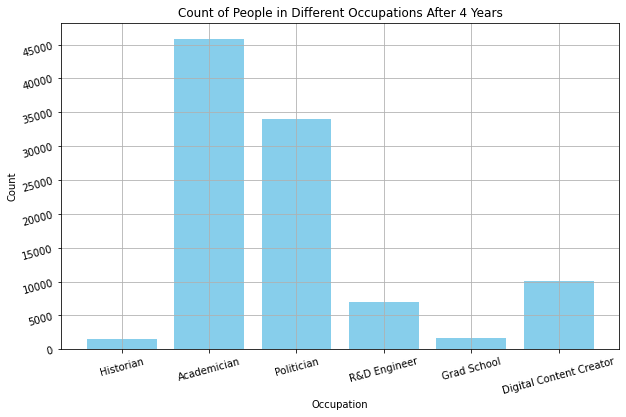

In [8]:
# plot the results
plt.figure(figsize=(10, 6))
plt.bar(after_years.keys(), after_years.values(), color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.grid(True)
plt.title('Count of People in Different Occupations After 4 Years')
plt.yticks(ticks=range(0,50000,5000),rotation=15, ha='right')
plt.xticks(rotation=15, ha='center')
plt.show()

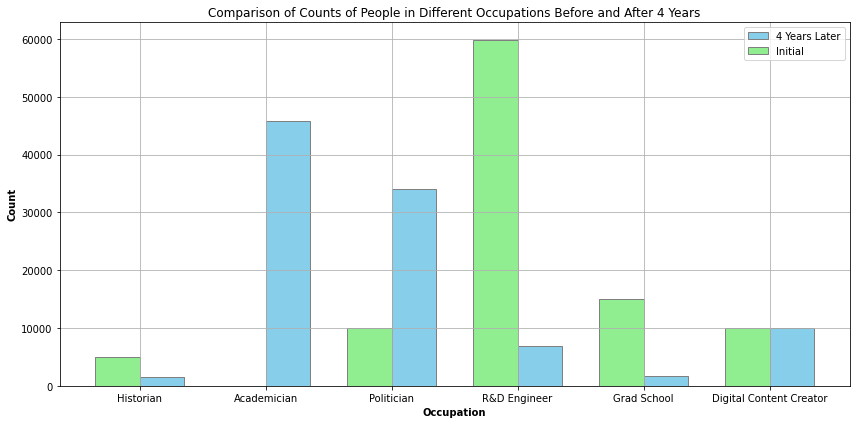

In [9]:
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(sample_list.keys()))
r2 = [x + bar_width for x in r1]

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(r2, 
        after_years.values(), 
        color='skyblue', 
        width=bar_width, 
        edgecolor='grey', 
        label='4 Years Later')

plt.bar(r1, 
        sample_list.values(), 
        color='lightgreen', 
        width=bar_width, 
        edgecolor='grey', 
        label='Initial')

plt.xlabel('Occupation', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(after_years.keys()))], after_years.keys(), ha='center')

plt.grid(True)
plt.legend()
plt.title('Comparison of Counts of People in Different Occupations Before and After 4 Years')
plt.tight_layout()
plt.show()

# Question 2:

First case that repetition codes are unused

In [10]:
bit_probabilities = {"success" : 0.955, "error" : 0.005}

In [11]:
def generate_bits(how_many):
    temp = []
    for _ in range(how_many):
        rand_int = random.getrandbits(64)
        binary_string = bin(rand_int)[2:]
        padded_string = binary_string.zfill(64)
        temp.append(padded_string)
    return temp

generated = generate_bits(100000)
print(generated[0:10])

['0100000100000100011110010100111000100111010010000111010011001101', '1100000011101011101010101011110100100000110001100110010100000010', '0011100011101100111000010011101001010011101101101010101100111001', '1101011111000011000001100111111110110101010101111000011110111101', '0011111111001010110011101100010111110001111001001010000100010100', '0110000000000010011010111011011010101011010000000111100011011010', '1110111011000011110011110011000001100001111110001011101101010110', '1111011011111111110101101001011010110101001000011001000111011110', '1100010000111011111000110000111110110000011000111111011010111110', '0000011001101111011110011010100010110101011011010010111110101011']


In [12]:
def transmitted_bits(bit_list):
    temp = []
    for bit_string in bit_list:
        transmitted_string = ""
        for bit in bit_string:
            chosen = random.choices(list(bit_probabilities.keys()), weights=bit_probabilities.values(), k=1)[0]
            if chosen == "error":
                transmitted_string += '1' if bit == '0' else '0'
            else:
                transmitted_string += bit
        temp.append(transmitted_string)
    return temp

transmitted = transmitted_bits(generated)
print(transmitted[0:10])

['0100000100000100011110010100111000100111010010000111010011001101', '1100000011101011101010101011110100100000110001100110010100000010', '0011100011101100111000010011101001010011101101101010101100111001', '1101011111000011000001100111111110110101010101111000011110111101', '0011111111001010110011101100010111110001111001001010000100010100', '0110000000000010011010111011011010101011010000000111100011011010', '1110111011000011110011110011000001100001111110001011101101010110', '1111011011111111110101101001011010110101001000011001000111011110', '1100010000111011111000110000111110110000011000111111011010111110', '0000011001101111011110011010100010110101011011010010111110101011']


In [13]:
def check_bits(generated, transmitted):
    temp = {"accepted" : 0, "declined" : 0}
    for i in range(len(generated)):
        check = 0
        for j in range(64):
            if generated[i][j] != transmitted[i][j]:
                check += 1
        if check > 1:
            temp["declined"] += 1
        else:
            temp["accepted"] += 1
    return temp

results = check_bits(generated, transmitted)

In [14]:
print_dic(results)
print(f"Experimental Probability Of Acceptance: {results['accepted']/(results['accepted']+results['declined'])}")

accepted: 95572
declined: 4428
Experimental Probability Of Acceptance: 0.95572


Second case that repetition codes are used

In [15]:
def repetition_code(bit):
    trip = {"success"  : bit,
            "error" : "1" if bit=="0" else "0"}
    triplet = ""
    for i in range(3):
        chosen = random.choices(list(bit_probabilities.keys()), 
                                weights=bit_probabilities.values(), 
                                k=1)[0]
        triplet += trip[chosen]
    temp = {"000" :"0",
            "001" :"0",
            "010" :"0",
            "100" :"0",
            "111" :"1",
            "110" :"1",
            "101" :"1",
            "011" :"1"}
    return temp[triplet]

In [16]:
def transmitted_bits_repetition(bit_list):
    temp = []
    for bit_string in bit_list:
        transmitted_string = ""
        for bit in bit_string:
            transmitted_string += repetition_code(bit)
        temp.append(transmitted_string)
    return temp

In [17]:
transmitted2 = transmitted_bits_repetition(generated)
print(generated[:10])
print(transmitted2[:10])

['0100000100000100011110010100111000100111010010000111010011001101', '1100000011101011101010101011110100100000110001100110010100000010', '0011100011101100111000010011101001010011101101101010101100111001', '1101011111000011000001100111111110110101010101111000011110111101', '0011111111001010110011101100010111110001111001001010000100010100', '0110000000000010011010111011011010101011010000000111100011011010', '1110111011000011110011110011000001100001111110001011101101010110', '1111011011111111110101101001011010110101001000011001000111011110', '1100010000111011111000110000111110110000011000111111011010111110', '0000011001101111011110011010100010110101011011010010111110101011']
['0100000100000100011110010100111000100111010010000111010011001101', '1100000011101011101010101011110100100000110001100110010100000010', '0011100011101100111000010011101001010011101101101010101100111001', '1101011111000011000001100111111110110101010101111000011110111101', '001111111100101011001110110001011111000111100

In [18]:
results2 = check_bits(generated, transmitted2)
print_dic(results2)
print(f"Experimental Probability Of Acceptance: {results2['accepted']/(results2['accepted']+results2['declined'])}")

accepted: 99998
declined: 2
Experimental Probability Of Acceptance: 0.99998
